In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import norm
from sklearn.naive_bayes import GaussianNB


/Users/gditzler/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


/Users/gditzler/anaconda/lib/python2.7/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


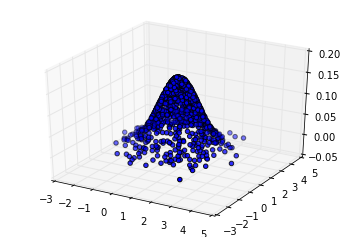

In [2]:
# generate a 2D gaussian with density 
def gauss_pdf(mean, cov, x):
    return (1./(((2*np.pi)**(1.*len(mean)/2))*np.linalg.det(cov)**.5))*np.exp(-np.matrix(x-mean)*np.matrix(np.linalg.inv(cov))*np.matrix(x-mean).T/2 ).tolist()[0][0]

N = 1000
p = []
mean = [1, 1]
cov = [[1, -.25], [-.25, 1]]
x = np.random.multivariate_normal(mean, cov, N)

for n in range(N):
    p.append( gauss_pdf(mean, cov, x[n]) )

p = np.array(p)

# plot the 2D RVs with the 3rd dim being the pdf value 
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(x[:,0], x[:,1], p)
ax.legend()

plt.show()

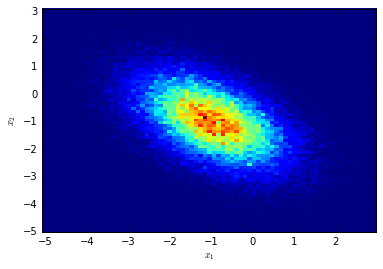

In [3]:
def mahal(mean, cov, x):
    return (-np.matrix(x-mean)*np.matrix(np.linalg.inv(cov))*np.matrix(x-mean).T/2 ).tolist()[0][0]


x = np.random.multivariate_normal([-1, -1], [[1, -.5], [-.5, 1]], 50000)
m = []
for n in range(N):
   m.append( gauss_pdf(mean, cov, x[n]) )

x = x.T
d = plt.hist2d(x[0], x[1], bins = 75)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')



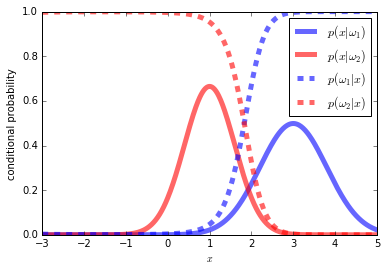

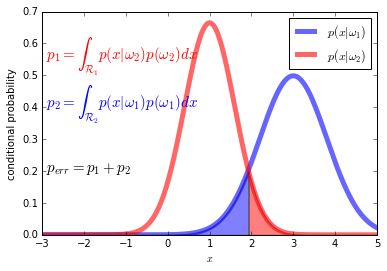

In [4]:
x = np.linspace(-3, 5, 500)

pw1 = .6
pw2 = .4
pxw1 = norm.pdf(x, 3, .8)
pxw2 = norm.pdf(x, 1, .6)
px = pxw1*pw1+pxw2*pw2
pwx1 = pxw1*pw1/px
pwx2 = pxw2*pw2/px

plt.figure()
plt.plot(x, pxw1, 'b-', lw=5, alpha=0.6, label='$p(x|\omega_1)$')
plt.plot(x, pxw2, 'r-', lw=5, alpha=0.6, label='$p(x|\omega_2)$')
plt.plot(x, pwx1, 'b--', lw=5, alpha=0.6, label='$p(\omega_1|x)$')
plt.plot(x, pwx2, 'r--', lw=5, alpha=0.6, label='$p(\omega_2|x)$')
plt.legend()
plt.xlabel('$x$')
plt.ylabel('conditional probability')


plt.figure()
plt.plot(x, pxw1, 'b-', lw=5, alpha=0.6, label='$p(x|\omega_1)$')
plt.plot(x, pxw2, 'r-', lw=5, alpha=0.6, label='$p(x|\omega_2)$')
plt.legend()
plt.fill_between(x, 0, pxw2, where=pxw1 > pxw2, facecolor='red', alpha=0.5)
plt.fill_between(x, 0, pxw1, where=pxw2 > pxw1, facecolor='blue', alpha=0.5)
plt.text(-2.9, .4, '$p_2 = \int_{\mathcal{R}_2}p(x|\omega_1)p(\omega_1)dx$', fontsize=15, color='b')
plt.text(-2.9, .55, '$p_1 = \int_{\mathcal{R}_1}p(x|\omega_2)p(\omega_2)dx$', fontsize=15, color='r')
plt.text(-2.9, .2, '$p_{err} = p_1+p_2$', fontsize=15)

ax.arrow(1.9, 0.5, 2.1, 0.05, head_width=0.05, head_length=0.05, fc='k', ec='k')

plt.xlabel('$x$')
plt.ylabel('conditional probability')

In [128]:
pxw1

array([  3.04290067e-13,   6.45777909e-13,   1.35658643e-12,
         2.82085414e-12,   5.80607533e-12,   1.18291511e-11,
         2.38557660e-11,   4.76213859e-11,   9.40978218e-11,
         1.84045832e-10,   3.56320884e-10,   6.82850205e-10,
         1.29532422e-09,   2.43220628e-09,   4.52054920e-09,
         8.31669684e-09,   1.51453536e-08,   2.73008921e-08,
         4.87128049e-08,   8.60356235e-08,   1.50411956e-07,
         2.60288683e-07,   4.45858537e-07,   7.55975573e-07,
         1.26878290e-06,   2.10783079e-06,   3.46619546e-06,
         5.64207986e-06,   9.09063634e-06,   1.44983379e-05,
         2.28881675e-05,   3.57661923e-05,   5.53226871e-05,
         8.47037624e-05,   1.28372208e-04,   1.92578677e-04,
         2.85965908e-04,   4.20328850e-04,   6.11551468e-04,
         8.80735908e-04,   1.25553050e-03,   1.77164911e-03,
         2.47455452e-03,   3.42125323e-03,   4.68211729e-03,
         6.34261330e-03,   8.50477942e-03,   1.12882534e-02,
         1.48306205e-02,

In [13]:
data = np.genfromtxt('data/optical_train.csv', delimiter=',')
X = data[:,0:-1]
y = data[:,-1]
data = np.genfromtxt('data/optical_test.csv', delimiter=',')
Xt = data[:,0:-1]
yt = data[:,-1]

gnb = GaussianNB()
gnb.fit(X, y)
ypred = gnb.predict(Xt)
print "Error: ", np.sum(1.*(y_pred != yt))/len(y_pred)

Error:  0.00666666666667


/Users/gditzler/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:11: DeprecationWarning: elementwise != comparison failed; this will raise an error in the future.


In [6]:
from sklearn import datasets
iris = datasets.load_iris()
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred = gnb.fit(iris.data, iris.target).predict(iris.data)
print("Number of mislabeled points out of a total %d points : %d"% (iris.data.shape[0],(iris.target != y_pred).sum()))


 Number of mislabeled points out of a total 150 points : 6


In [14]:
print y_pred, yt

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 1 2 2 2 2
 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2] [ 0.  1.  2. ...,  8.  9.  8.]
